# Simple Pendulum

First, we want to determine the motion of a simple pendulum.

<img src="..\pictures\simple_pendulum.png" style="width:200px; height:auto; display:block; margin-left:auto; margin-right:auto;">

The equation of motion is as follows:
$$
\ddot{\varphi} + \frac{g}{l}\sin\varphi = 0
$$
The reduction to a first-order differential equation system for the simple pendulum is given by:
$$
\mathbf{y}(t) = 
\left\{ 
    \begin{matrix}
        y_1(t) \\
        y_2(t) \\
    \end{matrix} 
\right\} =
\left\{ 
    \begin{matrix}
        \varphi(t) \\
        \dot{\varphi}(t) \\
    \end{matrix} 
\right\} 
\quad
\rightarrow
\quad
\mathbf{y}'(t) = 
\left\{ 
    \begin{matrix}
        \dot{\varphi}(t) \\
        \ddot{\varphi}(t) \\
    \end{matrix} 
\right\} = 
\left\{ 
    \begin{matrix}
        y_2(t) \\
        -\frac{\displaystyle g}{\displaystyle l}\sin y_1(t) \\
    \end{matrix} 
\right\}
$$



In [4]:
import matplotlib.pyplot as plt
import numpy as np
from explicit_integration import *

# simple pendulum
g = 9.807   # in m/s^2
l = 2       # in m
m = 3       # in kg
def dydt(t, y, g = g, l = l):
    return np.array([y[1], -g/l*np.sin(y[0])])

Define the initial conditions, time span, number of time steps and solve the problem.

In [71]:
# initial conditions
y0 = np.array([np.pi/2, 0])
# time span
t_span = [0, 20]
# number of steps
n = 500
# solve
t, y = Runge_Kutta_4(dydt, t_span, y0, n)

This is a *conservative system*, i.e., the solution must reflect the conservation of mechanical energy. Therefore, the mechanical energy is calculated and plotted over time, as is the deflection of the pendulum.

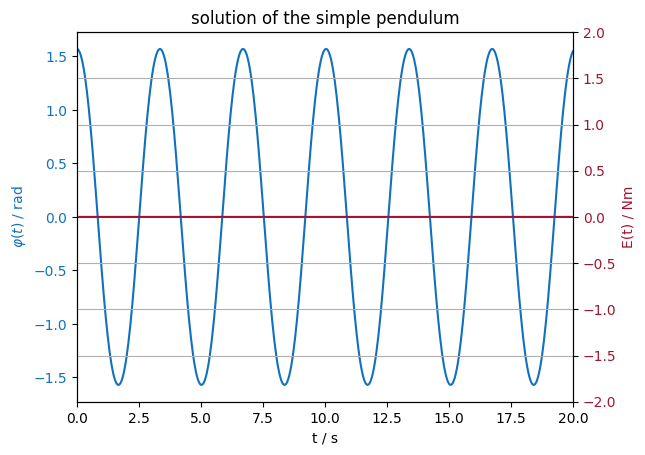

In [72]:
# mechanical energy
E = -m*g*l*np.cos(y[:,0]) + 0.5*m*(l*y[:,1])**2

# plot
fig, ax1 = plt.subplots()
# deflecttion
ax1.plot(t, y[:,0], color=[0.0667,0.4431,0.7451])
ax1.set_xlabel("t / s")
ax1.set_ylabel(r"$\varphi(t)$ / rad", color=[0.0667,0.4431,0.7451])
ax1.tick_params(axis="y", labelcolor=[0.0667,0.4431,0.7451])
# mechanical energy
ax2 = ax1.twinx()            
ax2.plot(t, E, color=[0.6353,0.0784,0.1843])
ax2.set_ylabel("E(t) / Nm", color=[0.6353,0.0784,0.1843])
ax2.tick_params(axis="y", labelcolor=[0.6353,0.0784,0.1843])
ax2.set_ylim([-2, 2])
#
plt.title("solution of the simple pendulum")
plt.grid(True)
plt.xlim(t_span)
plt.show()